# TSF GRIP Task 1 : Prediction using Supervised ML
#### Problem Statement : To Predict the percentage of marks of the students based on the number of hours they studied

## Author : Navneet Davang

In [1]:
# importing the essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv file
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# checking the data types of each column
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [4]:
# checking the if any column contains null data
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no missing data in given Dataset

### Visual Representation for Relationship Between No.of Hours Studied and Score Achieved

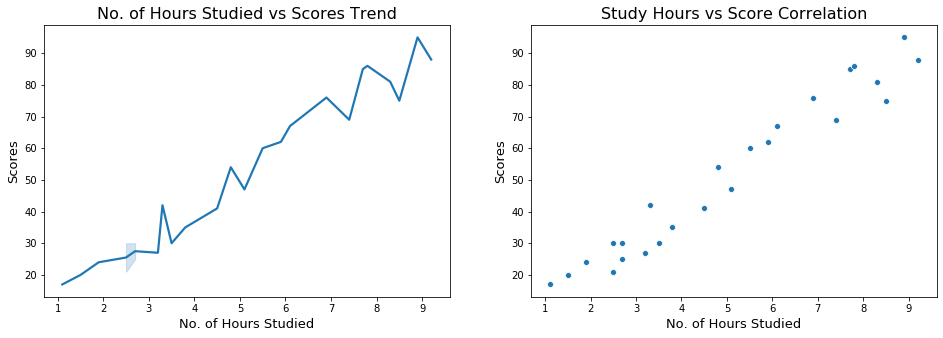

In [5]:
# seaborn settings
fig, ax = plt.subplots(1,2, figsize= (16,5))

# creating line plot for the given data
trend_plot = sns.lineplot(ax= ax[0],x='Hours', y='Scores', data=df ,linewidth=2.2)

# labelling the line chart
trend_plot.set_title('No. of Hours Studied vs Scores Trend', fontsize=16)
trend_plot.set_xlabel('No. of Hours Studied', fontsize=13)
trend_plot.set_ylabel('Scores', fontsize=13)

#creating the scatter plot for the given data 
corr_plot = sns.scatterplot(ax=ax[1], x='Hours', y='Scores', data=df)

# labelling the scatter plt
corr_plot.set_title('Study Hours vs Score Correlation', fontsize=16)
corr_plot.set_xlabel('No. of Hours Studied', fontsize=13)
corr_plot.set_ylabel('Scores', fontsize=13)

plt.show()

#### 1) From above Line Chart, we see that as no. of hours spent for studies increases the scores also increases.
#### 2) Also from above Scatter Plot, there is Positive Correlation between 'Hours' and 'Scores'.

### Creating the Linear Regression Model

In [6]:
# importing the libs essential for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### 1) Defining the features and the target from the data

In [7]:
features = df.Hours.values.reshape(len(df.Hours), 1)
target = df.Scores.values.reshape(len(df.Scores), 1)

#### 2) Splitting the Dataset into trainning and testing sets

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, random_state = 0)

#### 3) Fitting data into Linear Regression Model

In [17]:
regressor = LinearRegression().fit(Xtrain, ytrain)
print("Model Trained")

Model Trained


### Visual Representation of Best fit Line of Model

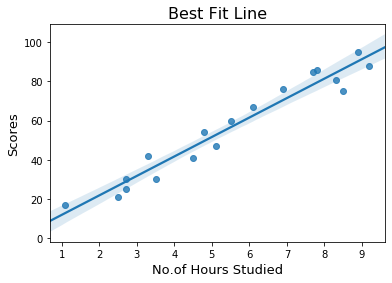

In [10]:
# plotting the best fit line for model
regLine = sns.regplot(x=Xtrain.reshape(-1), y=ytrain.reshape(-1))
# labelling the chart
regLine.set_title('Best Fit Line', fontsize=16)
regLine.set_xlabel('No.of Hours Studied', fontsize=13)
regLine.set_ylabel('Scores', fontsize=13)
plt.show()

### Testing the Model

In [11]:
val_predict = regressor.predict(Xtest)

#### - Visual Representation for Actual score vs Predicted score by Model

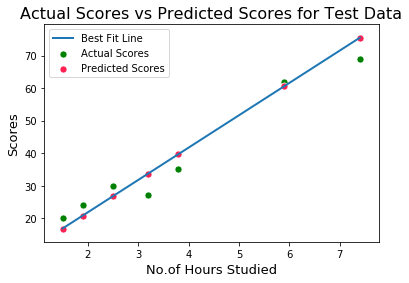

In [12]:
# best fit line representation
sns.lineplot(x=Xtest.reshape(-1), y = val_predict.reshape(-1), linewidth=2, label='Best Fit Line') 
# actual score representation
predict_plot = sns.scatterplot(x=Xtest.reshape(-1), y= ytest.reshape(-1), color='green', label='Actual Scores', s=50)
# predicted score representation
sns.scatterplot(x=Xtest.reshape(-1), y= val_predict.reshape(-1), color='#ff2052', label='Predicted Scores', s=50)
# labelling the chart
predict_plot.set_title('Actual Scores vs Predicted Scores for Test Data', fontsize=16)
predict_plot.set_xlabel('No.of Hours Studied', fontsize=13)
predict_plot.set_ylabel('Scores', fontsize=13)
plt.show()

### Evaluating Model

#### 1) Mean Absolute Error :

In [13]:
# calculating the mean absolute error
mae_error = mean_absolute_error(val_predict, ytest)
print("Mean Absolute Error : {mae:.2f}".format(mae = mae_error))

Mean Absolute Error : 4.13


#### 2) Mean Squared Error :

In [14]:
# calculating the mean squared error
mse_error = mean_squared_error(val_predict, ytest)
print("Mean Squared Error : {mse:.2f}".format(mse = mse_error))

Mean Squared Error : 20.33


#### Small value of Mean absolute error &  Mean squared error states that the chances of error or wrong forecasting through the model are very less.

#### 3) R2 Score :

In [15]:
# calculating the r2_score of Model
r2_score_result = r2_score(val_predict, ytest)
print("R2 Score : {:.8f}".format(r2_score_result))

R2 Score : 0.94910960


#### Higher value of R2 Score (~1) states amount of the variation in the output dependent attribute which is predictable from the input independent variable

### What will be predicted score if a student studies for 9.25 hrs/ day?

In [16]:
hour = [[9.25]]
score_predict = regressor.predict(hour)
print("Score : {}".format(int(round(score_predict[0][0]))))

Score : 94


#### According to Model, if a student studies for 9.25 hrs/day then, he/she will likely to score 94 marks 